# Que 1 -Startup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv("C:\\Users\\ASUS\\Downloads\\DATA SCIENCE\\ASSIGNMENTS\\multiple linear regression\\50_Startups.csv")

In [3]:
startup.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

<AxesSubplot:>

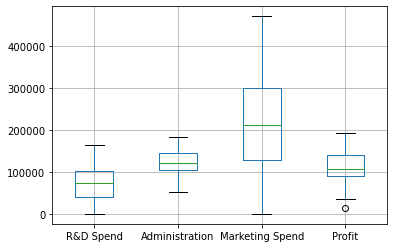

In [6]:
startup.boxplot()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

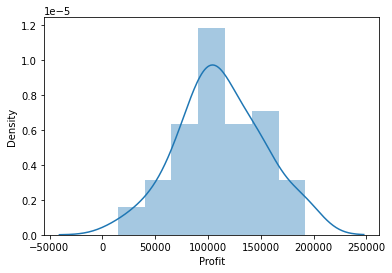

In [7]:
sns.distplot(startup['Profit'])

In [8]:
startup=startup.rename(columns={'R&D Spend':'RD',"Marketing Spend":"MS","Administration":"AD"})

In [9]:
print(startup.head())

          RD         AD         MS       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94


In [10]:
startup1=startup.drop(['State'],axis=1)

In [11]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler #standardize data 
array = startup1.values
scaler = StandardScaler().fit(array) # Standardizing data 
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 2.016  0.561  2.154  2.011]
 [ 1.956  1.083  1.924  1.999]
 [ 1.754 -0.728  1.627  1.981]
 [ 1.555 -0.096  1.422  1.777]
 [ 1.505 -1.08   1.282  1.358]]


In [12]:
print(startup1.head())

          RD         AD         MS     Profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94


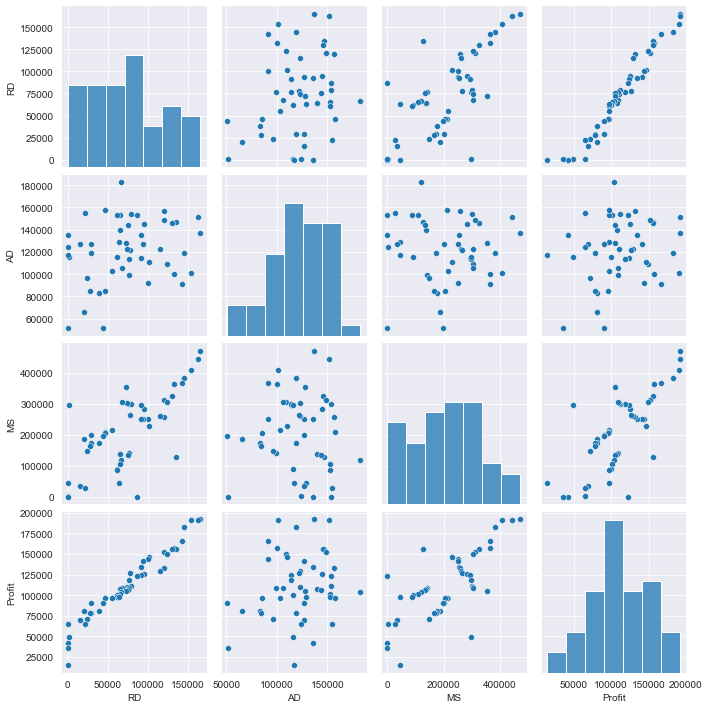

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(startup1)

In [14]:
modelrd = smf.ols('Profit~RD',data=startup).fit()
print(modelrd.tvalues, '\n', modelrd.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [15]:
print("Rsquared value RD :",modelrd.rsquared,"Adjusted Rsquared value RD:",modelrd.rsquared_adj)

Rsquared value RD : 0.9465353160804393 Adjusted Rsquared value RD: 0.9454214684987817


In [16]:
modelad = smf.ols('Profit~AD',data=startup).fit()
print(modelad.tvalues, '\n', modelad.pvalues)

Intercept    3.040044
AD           1.419493
dtype: float64 
 Intercept    0.003824
AD           0.162217
dtype: float64


In [17]:
print("Rsquared value AD :",modelad.rsquared,"Adjusted Rsquared value AD:",modelad.rsquared_adj)

Rsquared value AD : 0.04028714077757223 Adjusted Rsquared value AD: 0.020293122877105052


In [18]:
modelms = smf.ols('Profit~MS',data=startup).fit()
print(modelms.tvalues, '\n', modelms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [19]:
print("Rsquared value MS :",modelms.rsquared,"Adjusted Rsquared value MS:",modelms.rsquared_adj)

Rsquared value MS : 0.5591535746115515 Adjusted Rsquared value MS: 0.5499692740826254


In [20]:
modelmsad = smf.ols('Profit~MS+AD',data=startup).fit()
print(modelmsad.tvalues, '\n', modelmsad.pvalues)
modelmsad.summary()

Intercept    1.142741
MS           8.281039
AD           2.467779
dtype: float64 
 Intercept    2.589341e-01
MS           9.727245e-11
AD           1.729198e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           2.50e-10
Time:                        15:47:44   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
MS             0.2488      0.030      8.281      0.000       0.188       0.309
AD             0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df=pd.DataFrame(data={'Names':['RD','AD','MS'],'Rsquared ':[0.9465353160804393 ,0.04028714077757223 , 0.5591535746115515],'Adjusted Rsquared':[0.9454214684987817, 0.020293122877105052
, 0.5499692740826254 ]})

In [22]:
print(df)

  Names  Rsquared   Adjusted Rsquared
0    RD   0.946535           0.945421
1    AD   0.040287           0.020293
2    MS   0.559154           0.549969


In [23]:
model = smf.ols('Profit~RD+AD+MS',data=startup).fit()
print(model.tvalues, '\n', model.pvalues)
model.summary()

Intercept     7.626218
RD           17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        15:47:44   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [25]:
#R squared values for all the columns

print("Rsquared value for all :",model.rsquared,"Adjusted Rsquared value for all :",model.rsquared_adj)

Rsquared value for all : 0.9507459940683246 Adjusted Rsquared value for all : 0.9475337762901719


In [26]:
startup1.head()

RD         AD         MS     Profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

# VIF


In [27]:
rsq_profit = smf.ols('Profit~RD+AD+MS',data=startup).fit().rsquared  
vif_profit = 1/(1-rsq_profit)
vif_profit

20.30291711474573

In [28]:
rsq_rd = smf.ols('RD~Profit+AD+MS',data=startup).fit().rsquared  
vif_rd = 1/(1-rsq_rd)
vif_rd

19.563000566996017

In [29]:
rsq_ad = smf.ols('AD~Profit+RD+MS',data=startup).fit().rsquared  
vif_ad = 1/(1-rsq_ad)
vif_ad

1.1821455725780203

In [30]:
rsq_ms = smf.ols('MS~Profit+AD+RD',data=startup).fit().rsquared  
vif_ms= 1/(1-rsq_ms)
vif_ms

2.4653316722258247

In [31]:
df=pd.DataFrame(data={'Names':['Profit','RD','AD','MS'],'VIF':[vif_profit,vif_rd,vif_ad,vif_ms]})
df

Names        VIF
0  Profit  20.302917
1      RD  19.563001
2      AD   1.182146
3      MS   2.465332

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

In [32]:
res=model.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [33]:
res.mean()

3.958120942115784e-11

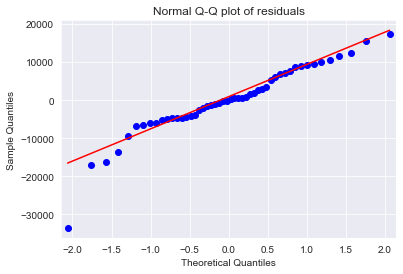

In [34]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# #Residual Plot for Homoscedasticity

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

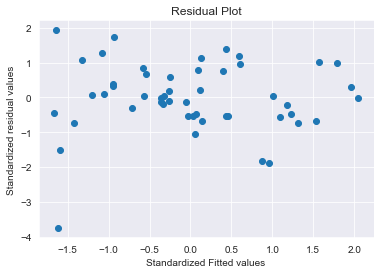

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

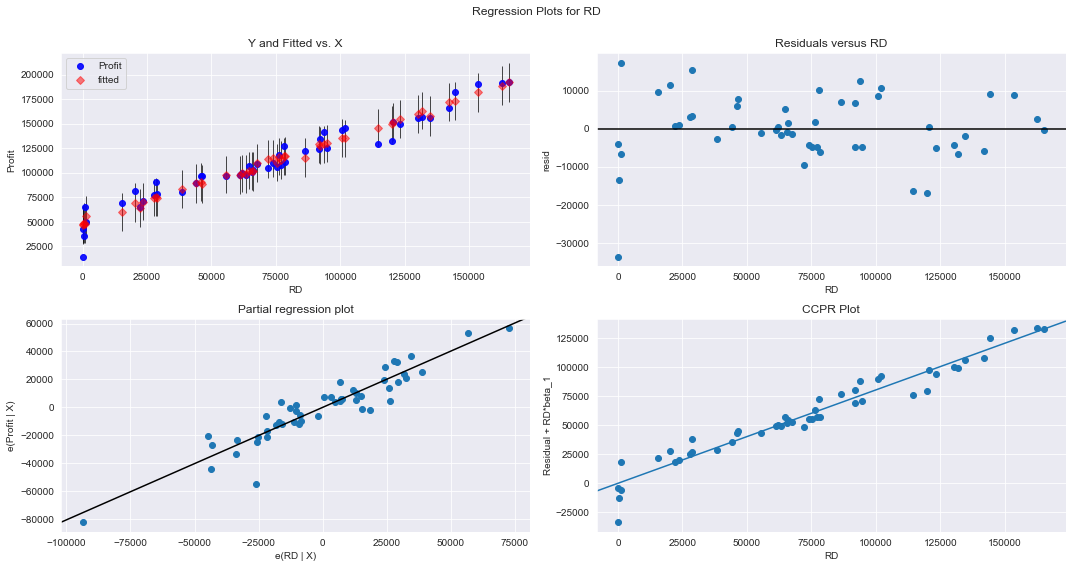

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

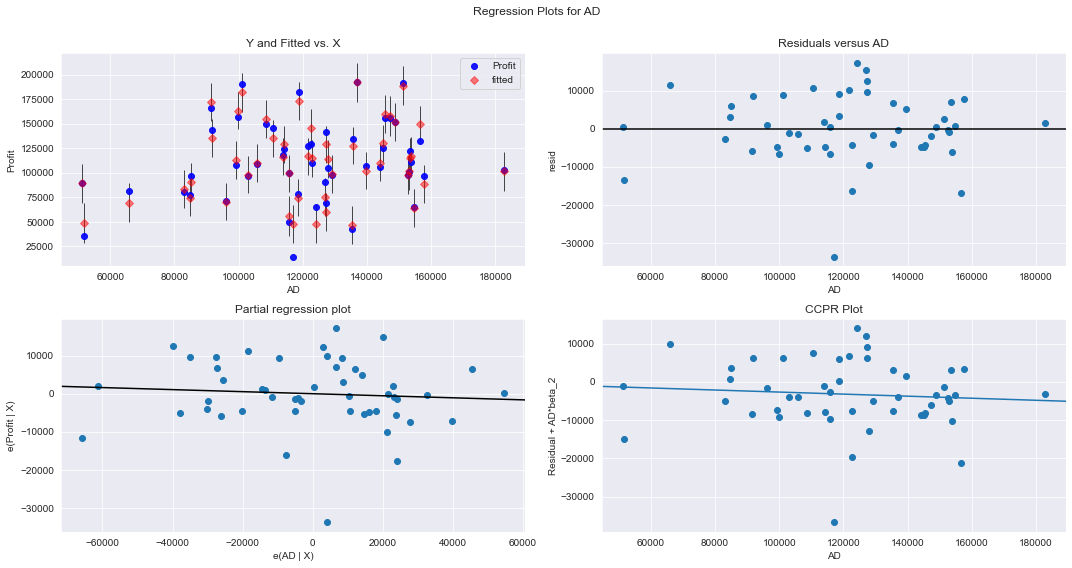

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "AD", fig=fig)
plt.show()

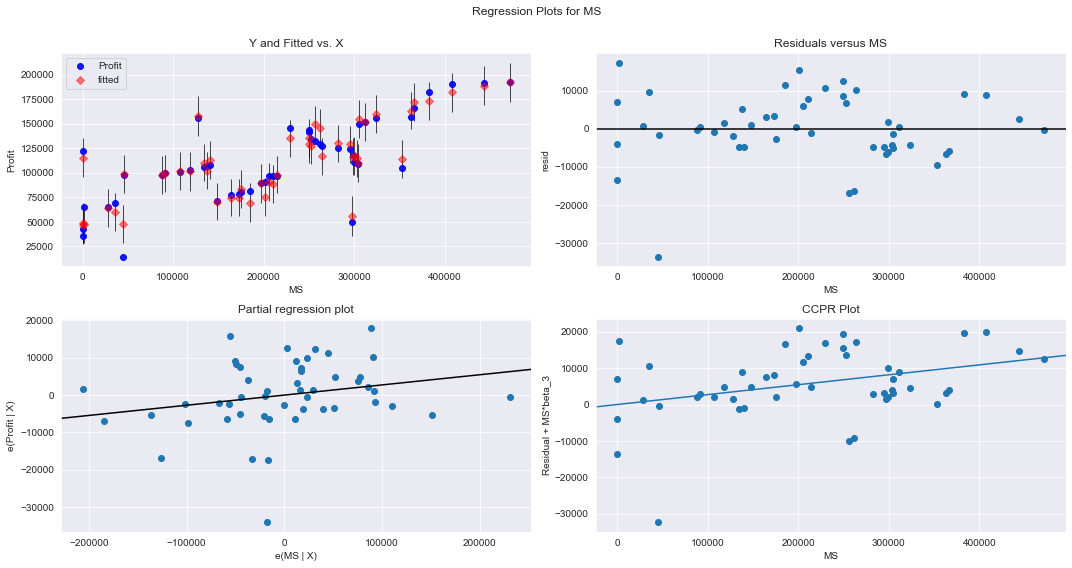

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cookâ€™s Distance

In [41]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

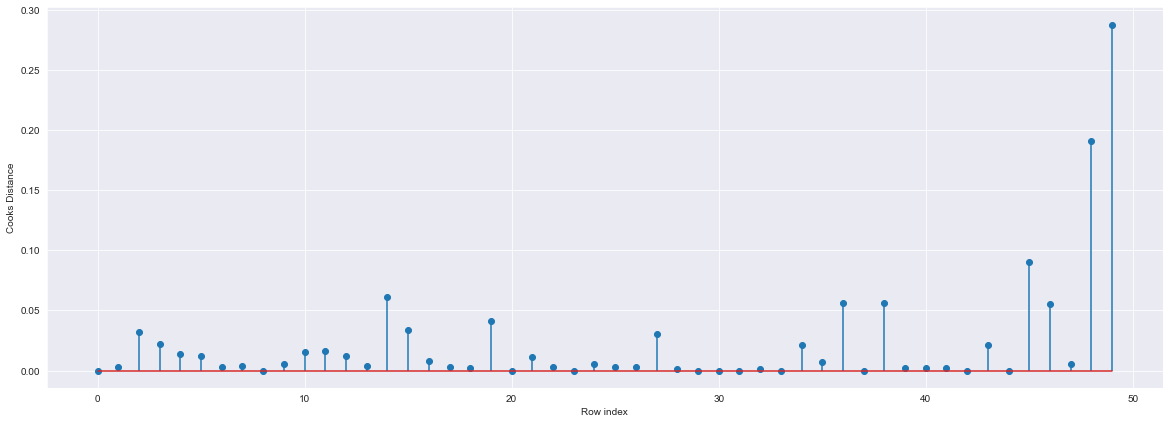

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

# Improving the model

In [44]:
#Load the data
startup1 = pd.read_csv("C:\\Users\\ASUS\\Downloads\\DATA SCIENCE\\ASSIGNMENTS\\multiple linear regression\\50_Startups.csv")

In [45]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup2=startup1.drop(startup1.index[[48,49]],axis=0).reset_index()

In [46]:
#Drop the original index
startup2=startup2.drop(['State'],axis=1)

In [47]:
startup2

index  R&D Spend  Administration  Marketing Spend     Profit
0       0  165349.20       136897.80        471784.10  192261.83
1       1  162597.70       151377.59        443898.53  191792.06
2       2  153441.51       101145.55        407934.54  191050.39
3       3  144372.41       118671.85        383199.62  182901.99
4       4  142107.34        91391.77        366168.42  166187.94
5       5  131876.90        99814.71        362861.36  156991.12
6       6  134615.46       147198.87        127716.82  156122.51
7       7  130298.13       145530.06        323876.68  155752.60
8       8  120542.52       148718.95        311613.29  152211.77
9       9  123334.88       108679.17        304981.62  149759.96
10     10  101913.08       110594.11        229160.95  146121.95
11     11  100671.96        91790.61        249744.55  144259.40
12     12   93863.75       127320.38        249839.44  141585.52
13     13   91992.39       135495.07        252664.93  134307.35
14     14  119943.24       156547.42        256512.92  132602.65
15     15  114523.61       122616.84        261776.23  129917.04
16     16   78013.11       121597.55        264346.06  126992.93
17     17   94657.16       145077.58        282574.31  125370.37
18     18   91749.16       114175.79        294919.57  124266.90
19     19   86419.70       153514.11             0.00  122776.86
20     20   76253.86       113867.30        298664.47  118474.03
21     21   78389.47       153773.43        299737.29  111313.02
22     22   73994.56       122782.75        303319.26  110352.25
23     23   67532.53       105751.03        304768.73  108733.99
24     24   77044.01        99281.34        140574.81  108552.04
25     25   64664.71       139553.16        137962.62  107404.34
26     26   75328.87       144135.98        134050.07  105733.54
27     27   72107.60       127864.55        353183.81  105008.31
28     28   66051.52       182645.56        118148.20  103282.38
29     29   65605.48       153032.06        107138.38  101004.64
30     30   61994.48       115641.28         91131.24   99937.59
31     31   61136.38       152701.92         88218.23   97483.56
32     32   63408.86       129219.61         46085.25   97427.84
33     33   55493.95       103057.49        214634.81   96778.92
34     34   46426.07       157693.92        210797.67   96712.80
35     35   46014.02        85047.44        205517.64   96479.51
36     36   28663.76       127056.21        201126.82   90708.19
37     37   44069.95        51283.14        197029.42   89949.14
38     38   20229.59        65947.93        185265.10   81229.06
39     39   38558.51        82982.09        174999.30   81005.76
40     40   28754.33       118546.05        172795.67   78239.91
41     41   27892.92        84710.77        164470.71   77798.83
42     42   23640.93        96189.63        148001.11   71498.49
43     43   15505.73       127382.30         35534.17   69758.98
44     44   22177.74       154806.14         28334.72   65200.33
45     45    1000.23       124153.04          1903.93   64926.08
46     46    1315.46       115816.21        297114.46   49490.75
47     47       0.00       135426.92             0.00   42559.73

In [48]:
#Drop the original index
startup2=startup2.drop(['index'],axis=1)

In [49]:
#rename the col
startups2=startup2.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)

In [50]:
startups2.head()

rd         ad         ms     Profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

# Build Model

In [51]:
#Exclude variable "ad" and generate R-Squared and AIC values
final_ml_ad= smf.ols('Profit~rd+ms',data = startups2).fit()

In [52]:
(final_ml_ad.rsquared,final_ml_ad.aic)

(0.9609119875752478, 994.8864429429412)

In [53]:
#Exclude variable "ms" and generate R-Squared and AIC values
final_ml_ms= smf.ols('Profit~rd+ad',data = startups2).fit()

In [54]:
(final_ml_ms.rsquared,final_ml_ms.aic)

(0.9613542664192156, 994.3402293693792)

# Predicting for new data

In [55]:
#New data for prediction
new_data=pd.DataFrame({'rd':162597.70,'ad':118671.85,'ms':304981.52},index=[1])

In [56]:
new_data

rd         ad         ms
1  162597.7  118671.85  304981.52

In [57]:
final_ml_ad.predict(new_data)

1    183740.8243
dtype: float64

In [58]:
final_ml_ad.predict(startups2.iloc[0:5,])

0    189885.740778
1    187095.246496
2    179181.591670
3    171606.096081
4    169451.985498
dtype: float64

In [59]:
pred_y = final_ml_ad.predict(startups2)

In [60]:
pred_y

0     189885.740778
1     187095.246496
2     179181.591670
3     171606.096081
4     169451.985498
5     161500.313852
6     157929.476340
7     159344.167484
8     151541.585916
9     153530.033848
10    135216.183117
11    134758.234001
12    129521.945343
13    128150.253596
14    149749.963756
15    145706.920129
16    117675.954567
17    130922.882285
18    128983.420883
19    117761.257387
20    117150.983892
21    118820.135210
22    115524.963571
23    110587.752231
24    113941.581902
25    104353.248043
26    112464.314154
27    115277.118261
28    104941.871740
29    104332.812499
30    101167.803455
31    100437.197751
32    101168.375422
33     99148.202614
34     92078.263418
35     91633.714754
36     78177.525204
37     89932.884669
38     71304.837486
39     85160.144690
40     77563.103445
41     76699.268770
42     73029.882710
43     64054.516093
44     69014.452144
45     52081.185452
46     59452.173426
47     51265.583966
dtype: float64